# Decision Tree
http://scikit-learn.org/stable/modules/tree.html

# Import stock data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='MAINUT5068DCQGJ9',output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata



# get all available daily data (Netflix)
mydata, meta_data = ts.get_daily('NFLX',outputsize='full')

Text(0.5,0,'Date')

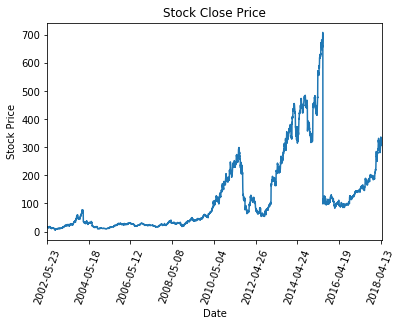

In [3]:
#data.head()
mydata['4. close'].plot()
plt.xticks(rotation=70)
plt.title('Stock Close Price')
plt.ylabel('Stock Price')
plt.xlabel('Date')

## Pre-processing
Choice of no preprocessing, differencing or Moving Average with N=5

In [4]:
dataset = mydata['4. close'].loc['2006-04-26':'2007-04-26'].values
dataset = dataset.astype('float32')

In [5]:
preproc = input("What Preprocessing do you like? None (N), Differencing (D) or Moving Average (M): ")
print("You chose: ", preproc)
#type(preproc)


What Preprocessing do you like? None (N), Differencing (D) or Moving Average (M): N
You chose:  N


In [6]:
if preproc == 'D':
    dataset = np.diff(dataset)
    print('Differencing applied')
elif preproc == 'M':
    cumsum = np.cumsum(np.insert(dataset, 0, 0)) 
    dataset = (cumsum[5:] - cumsum[:-5]) / float(5)
    print('Moving Average applied')
else:
    dataset = dataset
    print('no preprocessing applied')

no preprocessing applied


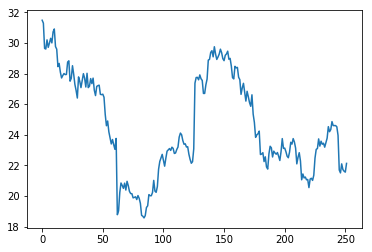

In [7]:
plt.plot(dataset)

In [8]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

168 84


# Neural Network


In [9]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [10]:
look_back = input("How many days in the past do you want to use as feature vector? ")
print("You chose: ", look_back)

How many days in the past do you want to use as feature vector? 2
You chose:  2


In [11]:
look_back = int(look_back)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
from sklearn import tree

In [13]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(trainX, trainY)

In [14]:
trainPredict = clf.predict(trainX)
testPredict = clf.predict(testX)

In [15]:
print(testPredict)

[ 26.45000076  27.15999985  26.64999962  24.59000015  26.64999962
  24.59000015  24.89999962  23.39999962  24.          23.62000084
  23.80999947  22.32999992  22.38999939  23.04000092  21.95000076
  22.71999931  22.46999931  23.07999992  22.47999954  23.85000038
  22.72999954  22.13999939  23.01000023  23.04000092  22.38999939
  23.04000092  22.32999992  21.95000076  27.37000084  18.78000069
  23.76000023  22.97999954  23.01000023  22.32999992  22.13999939
  23.01000023  23.85000038  23.20000076  18.78000069  23.04999924
  23.40999985  21.95000076  22.93000031  23.04000092  21.95000076
  20.29999924  22.26000023  20.29999924  20.29999924  20.29999924
  20.29999924  20.84000015  20.38999939  20.29999924  20.29999924
  20.29999924  22.47999954  23.20000076  22.97999954  18.78000069
  23.04999924  22.72999954  23.40999985  23.20000076  23.21999931
  22.78000069  18.78000069  24.          23.80999947  23.80999947
  24.19000053  24.19000053  24.19000053  24.19000053  23.80999947
  23.62000

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 1.38 RMSE


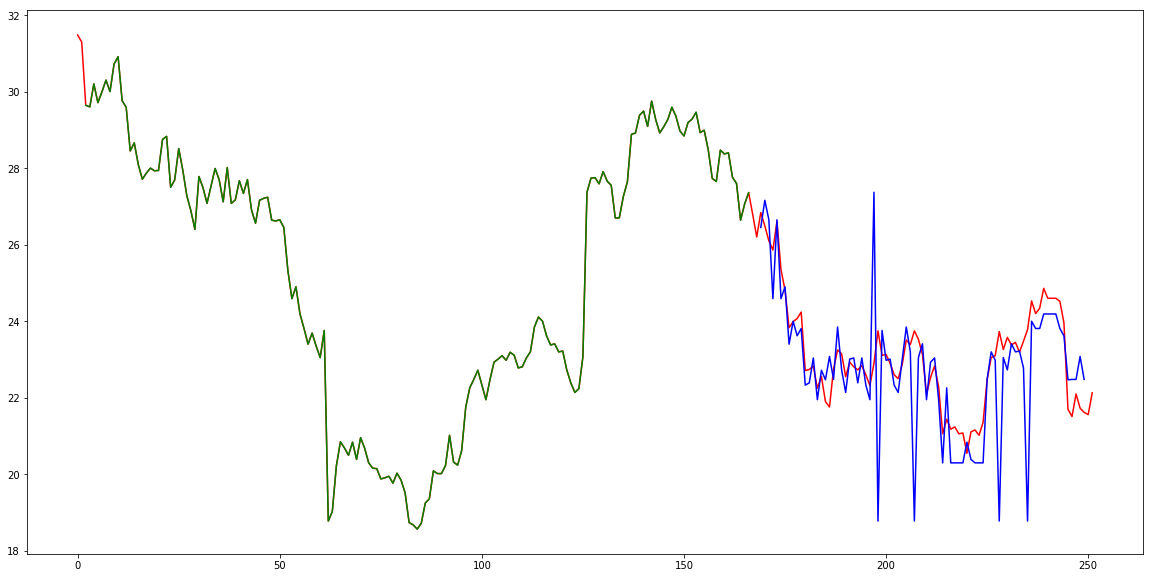

In [20]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:]

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset)-2] = testPredict[:]

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(dataset,'r')
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'b')
plt.show()